In [1]:
%pylab
%pylab inline
%matplotlib inline
%load_ext autoreload
%autoreload 2
import numpy as np
import itertools
from k_means import (K_MEANS, find_best_grouping)

Using matplotlib backend: Qt5Agg
Populating the interactive namespace from numpy and matplotlib
Populating the interactive namespace from numpy and matplotlib


# Excersice 0

In [2]:
from sklearn import datasets
iris = datasets.load_iris()
petal_length = iris.data[:,iris.feature_names.index('petal length (cm)')]
petal_width = iris.data[:, iris.feature_names.index('petal width (cm)')]

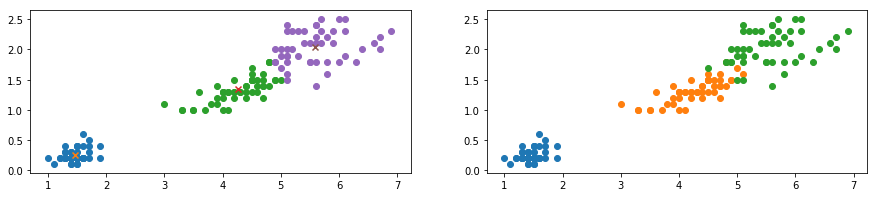

In [3]:
iris_data = iris.data[:,[iris.feature_names.index('petal length (cm)'), iris.feature_names.index('petal width (cm)')]]
r, grouping = K_MEANS(iris_data, len(iris.feature_names) - 1)

fig, (ax1, ax2) = plt.subplots(1, 2)
fig.set_size_inches(15, 3)
for x in range(3):
    d = iris_data[grouping == x]
    ax1.scatter(d[:,0], d[:, 1])
    ax1.scatter([r[x][0]], [r[x][1]], marker = 'x')
for x in range(3):
    d = iris_data[iris.target == x]
    ax2.scatter(d[:,0], d[:, 1])
    ax2.set

In [4]:
r, grouping = K_MEANS(iris_data, len(iris.feature_names) - 1)
find_best_grouping(iris.target, grouping, len(iris.feature_names) - 1)

94.66666666666667

# Excercise 1

In [5]:
def generateData(N,d,K,p,mi,Sigma):
    A = np.linalg.cholesky(Sigma.T).T
    distributions = np.random.choice(np.arange(0,K), N, p=p)
    # print('N=\n',N,'\n\n','d=\n',d,'\n\n','K=\n',K,'\n\n','p=\n',p,'\n\n','mi=\n',mi,'\n\n','Sigma=\n',Sigma, '\n\n','A=\n', A)
    X = np.random.randn(d,N)
    for i in range(N):
        X[:,i] = mi[:,distributions[i]] + np.dot(A[:,:,distributions[i]], X[:,i])
    return X, distributions

Classification accucuracy: 96.84


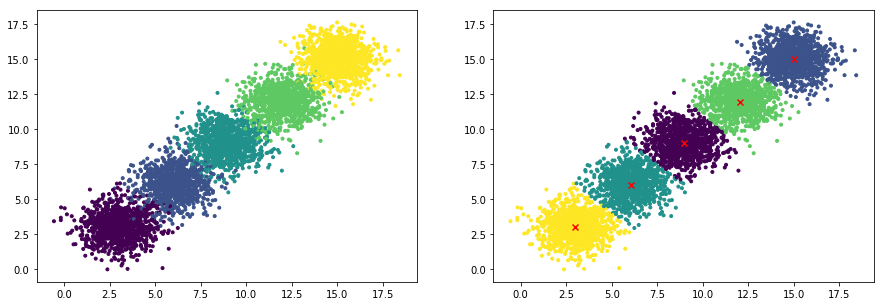

In [6]:
# a)
N = 5000
d = 2
K = 5
p = np.ones(K)/K
mi = np.array(3 * np.ones((d,1)) * np.arange(1,K+1))
Sigma = np.array([np.eye(d) for i in range(K)]).T
X, groups = generateData(N,d,K,p,mi,Sigma)
fig, (ax1, ax2) = plt.subplots(1, 2)
fig.set_size_inches(15, 5)
ax1.scatter(X[0,:],X[1,:], marker='.', c=groups)
r, grouping = K_MEANS(X.T, K)
ax2.scatter(X[0,:],X[1,:], marker='.', c=grouping)
ax2.scatter(r.T[0,:],r.T[1,:], marker='x', c='r')
print(
    f'Classification accucuracy: {find_best_grouping(groups, grouping, K)}'
)

Classification accucuracy: 95.06


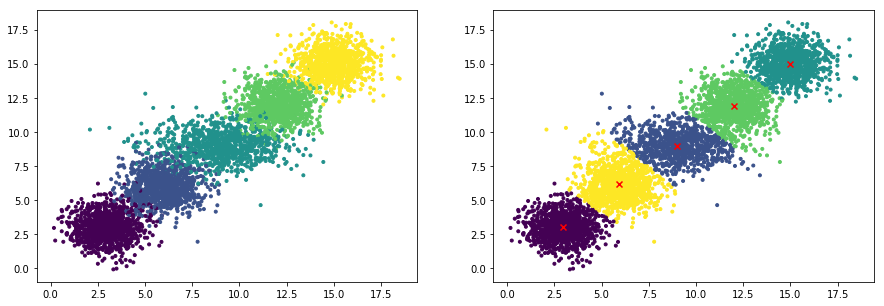

In [7]:
# b)
N = 5000
d = 2
K = 5
p = np.ones(K)/K
mi = np.array(3 * np.ones((d,1)) * np.arange(1,K+1))
Sigma = np.array([np.eye(d) if i != 2 else np.array([[3,0],[0,1]]) for i in range(K)]).T
X, groups = generateData(N,d,K,p,mi,Sigma)
fig, (ax1, ax2) = plt.subplots(1, 2)
fig.set_size_inches(15, 5)
ax1.scatter(X[0,:],X[1,:], marker='.', c=groups)
r, grouping = K_MEANS(X.T, K)
ax2.scatter(X[0,:],X[1,:], marker='.', c=grouping)
ax2.scatter(r.T[0,:],r.T[1,:], marker='x', c='r')
print(
    f'Classification accucuracy: {find_best_grouping(groups, grouping, K)}'
)

Classification accucuracy: 93.5


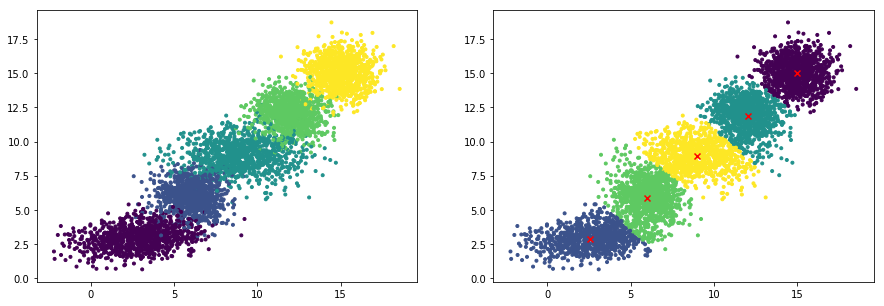

In [8]:
# c)
N = 5000
d = 2
K = 5
p = np.ones(K)/K
mi = np.array(3 * np.ones((d,1)) * np.arange(1,K+1))
Sigma = np.array(
    [
        (np.array([[3,1],[1,1]]) if i == 0 else (
        np.array([[3,0],[0,1]]) if i == 2 else
            np.eye(d)
        ))
        for i in range(K)
    ]).T
X, groups = generateData(N,d,K,p,mi,Sigma)
fig, (ax1, ax2) = plt.subplots(1, 2)
fig.set_size_inches(15, 5)
ax1.scatter(X[0,:],X[1,:], marker='.', c=groups)
r, grouping = K_MEANS(X.T, K)
ax2.scatter(X[0,:],X[1,:], marker='.', c=grouping)
ax2.scatter(r.T[0,:],r.T[1,:], marker='x', c='r')
print(
    f'Classification accucuracy: {find_best_grouping(groups, grouping, K)}'
)

Classification accucuracy: 91.16


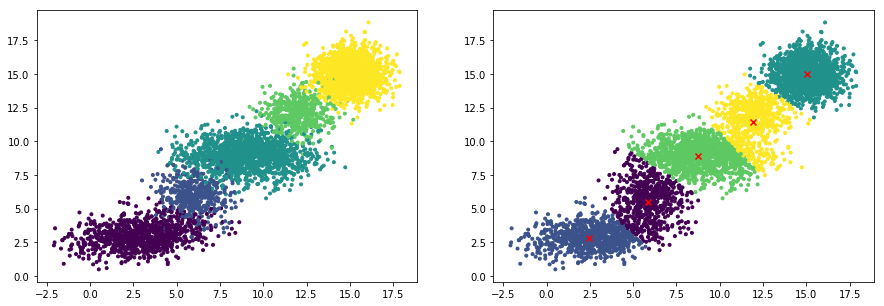

In [9]:
# d)
N = 5000
d = 2
K = 5
p =  np.array([0.2, 0.1, 0.3, 0.1, 0.3])
mi = np.array(3 * np.ones((d,1)) * np.arange(1,K+1))
Sigma = np.array(
    [
        (np.array([[3,1],[1,1]]) if i == 0 else (
        np.array([[3,0],[0,1]]) if i == 2 else
            np.eye(d)
        ))
        for i in range(K)
    ]).T
X, groups = generateData(N,d,K,p,mi,Sigma)
fig, (ax1, ax2) = plt.subplots(1, 2)
fig.set_size_inches(15, 5)
ax1.scatter(X[0,:],X[1,:], marker='.', c=groups)
r, grouping = K_MEANS(X.T, K)
ax2.scatter(X[0,:],X[1,:], marker='.', c=grouping)
ax2.scatter(r.T[0,:],r.T[1,:], marker='x', c='r')
print(
    f'Classification accucuracy: {find_best_grouping(groups, grouping, K)}'
)

Classification accucuracy: 98.2


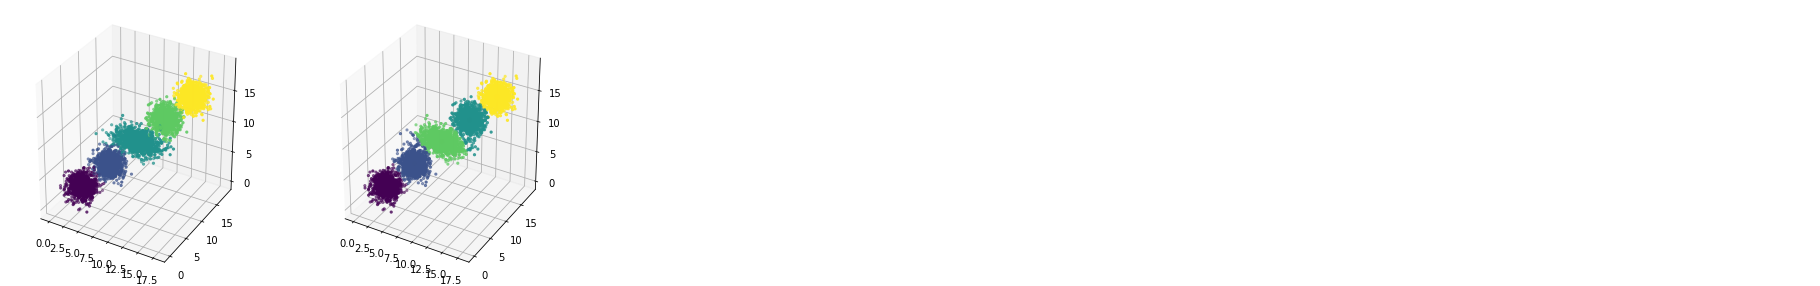

In [40]:
# e)
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

N = 5000
d = 3
K = 5
p = np.ones(K)/K
mi = np.array(3 * np.ones((d,1)) * np.arange(1,K+1))
Sigma = np.array([
    np.eye(d) if i != 2 else np.array([[3,1,0],[1,1,0], [0,0,1]]) 
    for i in range(K)
]).T
X, groups = generateData(N,d,K,p,mi,Sigma)
fig = plt.figure(figsize=(10,5))
# fig.set_size_inches(30, 5)
ax1 = fig.add_subplot(121, projection='3d')
ax1.scatter3D(X[0,:],X[1,:], X[2,:] ,marker='.', c=groups)
r, grouping = K_MEANS(X.T, K)
ax2 = fig.add_subplot(122, projection='3d')
ax2.scatter3D(X[0,:],X[1,:], X[2,:], marker='.', c=grouping)
ax2.scatter3D(r.T[0,:],r.T[1,:], r.T[2,:], 'ko', c='red')
print(
    f'Classification accucuracy: {find_best_grouping(groups, grouping, K)}'
)

CPU times: user 891 ms, sys: 35.5 ms, total: 927 ms
Wall time: 252 ms


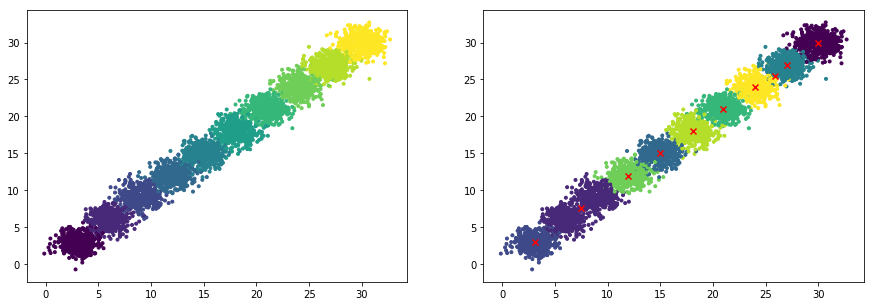

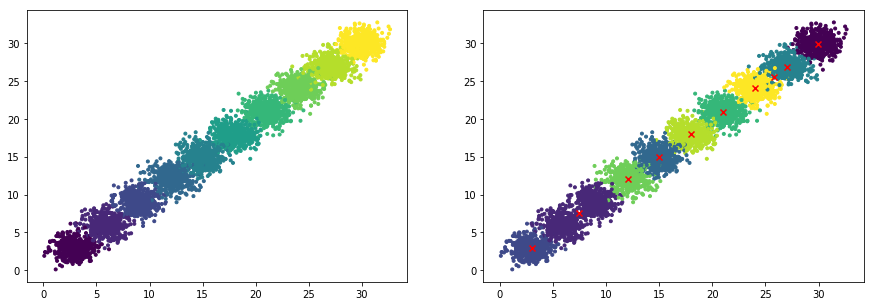

In [41]:
%%time
# f)
N = 5000
d = 100
K = 10
p = np.ones(K)/K
mi = np.array(3 * np.ones((d,1)) * np.arange(1,K+1))
Sigma = np.array([np.eye(d) for i in range(K)]).T
X, groups = generateData(N,d,K,p,mi,Sigma)
r, grouping = K_MEANS(X.T, K)
fig, (ax1, ax2) = plt.subplots(1, 2)
fig.set_size_inches(15, 5)
d1, d2 = 0,1
ax1.scatter(X[d1,:],X[d2,:], marker='.', c=groups)
ax2.scatter(X[d1,:],X[d2,:], marker='.', c=grouping)
ax2.scatter(r.T[d1,:],r.T[d2,:], marker='x', c='r')


fig, (ax1, ax2) = plt.subplots(1, 2)
fig.set_size_inches(15, 5)
d1, d2 = 3,4
ax1.scatter(X[d1,:],X[d2,:], marker='.', c=groups)
ax2.scatter(X[d1,:],X[d2,:], marker='.', c=grouping)
ax2.scatter(r.T[d1,:],r.T[d2,:], marker='x', c='r')

# Excersize 2

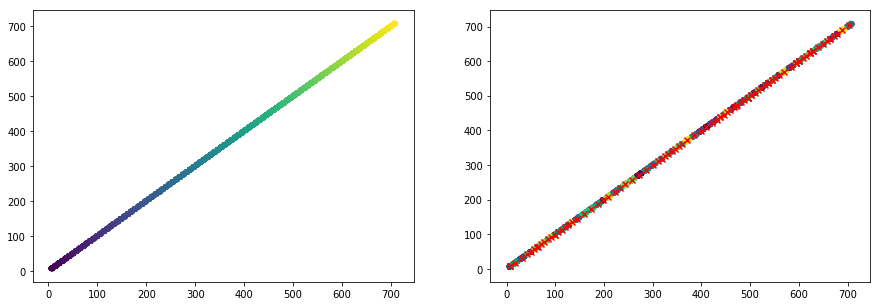

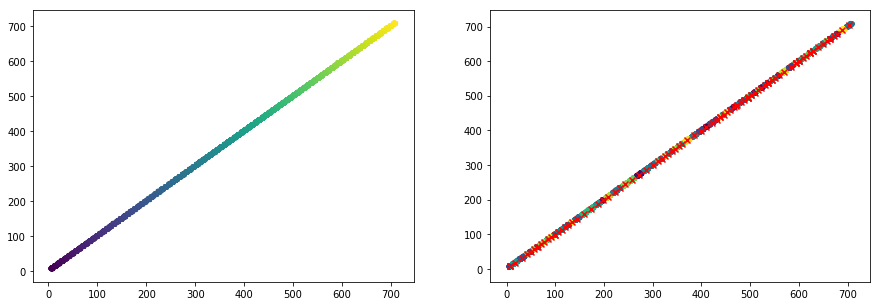

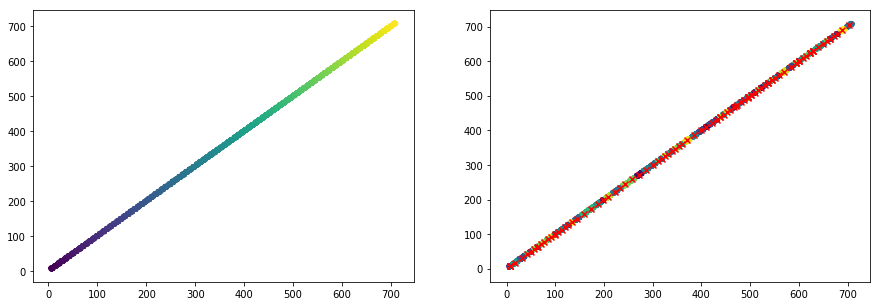

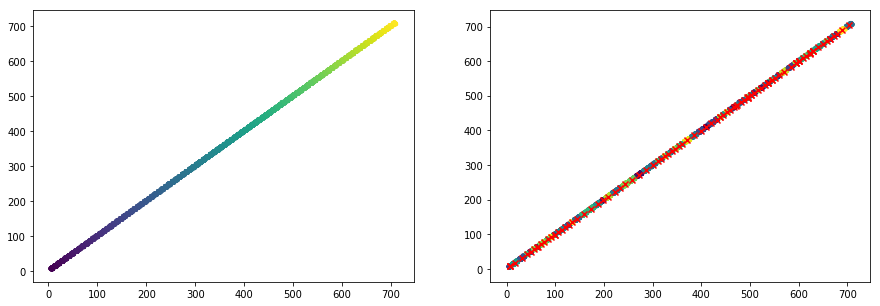

CPU times: user 1min 27s, sys: 7.58 s, total: 1min 35s
Wall time: 53 s


In [44]:
%%time
N = 100000
d = 100
K = 100

p = 1/K * np.ones(K)
Sigma = np.array([np.eye(d) for i in range(K)]).T
q = 10
dist = q/np.sqrt(2)
mi = dist * np.ones((d,1)) * np.arange(1,K+1)

X, groups = generateData(N,d,K,p,mi,Sigma)
r, grouping = K_MEANS(X.T, K)

for d1, d2 in [(0,1), (0,10), (0,20), (1,30)]:
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(15, 5)
    ax1.scatter(X[d1,:],X[d2,:], marker='.', c=groups)
    ax2.scatter(X[d1,:],X[d2,:], marker='.', c=grouping)
    ax2.scatter(r.T[d1,:],r.T[d2,:], marker='x', c='r')
    plt.show()